In [1]:
# importando as bibliotecas do Python que serão usadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# Análise Exploratória de Dados (EDA)

In [5]:
# criando duas amostras, diferentes apenas no último elemento
amostra1 = [21,22,25,21,22,24,24,23,25]
amostra2 = [21,22,25,21,22,24,24,23,89]
n = 9 # número de elementos nas amostras

print('amostra 1:', amostra1)
print('amostra 2:', amostra2)

amostra 1: [21, 22, 25, 21, 22, 24, 24, 23, 25]
amostra 2: [21, 22, 25, 21, 22, 24, 24, 23, 89]


## 1. Medidas de tendência central
### 1.1 Média

In [6]:
# extraindo as médias de cada amostra:
media1 = (21+22+25+21+22+24+24+23+25)/n
media2 = (21+22+25+21+22+24+24+23+89)/n

print('- media amostra 1:', media1)
print('- media amostra 2:', np.round(media2,1))
print('(obs: notem a diferença na média)')

- media amostra 1: 23.0
- media amostra 2: 30.1
(obs: notem a diferença na média)


### 1.2 Mediana

<img src='imagens/2.png' width="400" height="200" align="left">

In [7]:
# Pra calcular a mediana das amostras, o primeiro passo é colocá-las em ordem crescente:
amostra1 = [21,21,22,22,23,24,24,25,25]
amostra2 = [21,21,22,22,23,24,24,25,89]

# Extraindo as medianas:
# obs: nossas amostras possuem valor de 'n' ímpares, portanto:

mediana1 = 23
mediana2 = 23

# Caso nossas amostras tivessem 10 elementos cada ('n' seria par), teríamos:
amostra3 = [21,21,22,22,23,24,24,25,25,26]
amostra4 = [21,21,22,22,23,24,24,25,26,89]

# Se fizermos n/2 e (n/2)+1 conforme a fórmula, obteríamos 5 e 6 respectivamente. 
# Essas são as posições dos elementos na amostra que a divide em duas partes iguais.

# Na amostra 3, as posições 5 e 6 são os valores 23 e 24, respectivamente.
# Na amostra 4, as posições 5 e 6 são esses mesmos valores.
# Logo:

mediana3 = (23+24)/2
mediana4 = (23+24)/2

print('- mediana amostra 1:', mediana1)
print('- mediana amostra 2:', mediana2)
print('- mediana amostra 3:', mediana3)
print('- mediana amostra 4:', mediana4)
print('(obs: notem que os valores extremos existentes não alteraram o valor das medianas entre as amostras 1-2 e 3-4)')

- mediana amostra 1: 23
- mediana amostra 2: 23
- mediana amostra 3: 23.5
- mediana amostra 4: 23.5
(obs: notem que os valores extremos existentes não alteraram o valor das medianas entre as amostras 1-2 e 3-4)


In [8]:
# Poderíamos calcular todas essas medidas automaticamente de acordo com cada linguagem de programação e suas bibliotecas.
# Utilizando a biblioteca Numpy do Python, ficaria assim:

media1 = np.mean(amostra1)
media2 = np.mean(amostra2)

mediana1 = np.median(amostra1)
mediana2 = np.median(amostra2)
mediana3 = np.median(amostra3)
mediana4 = np.median(amostra4)

print('- media amostra 1:', media1)
print('- media amostra 2:', np.round(media2,1))
print('- mediana amostra 1:', mediana1)
print('- mediana amostra 2:', mediana2)
print('- mediana amostra 3:', mediana3)
print('- mediana amostra 4:', mediana4)

- media amostra 1: 23.0
- media amostra 2: 30.1
- mediana amostra 1: 23.0
- mediana amostra 2: 23.0
- mediana amostra 3: 23.5
- mediana amostra 4: 23.5


## 2. Medidas de dispersão
### 2.1 Desvio-padrão e variância

<img src='imagens/desvio.png' width="300" height="150" align="left">

In [9]:
s_amostra1 = np.std(amostra1, ddof=1)
s_amostra2 = np.std(amostra2, ddof=1)

# a variância é apenas o desvio-padrão elevado ao quadrado:
var_amostra1 = s_amostra1**2
var_amostra2 = s_amostra2**2

print('- desvio-padrão amostra 1:', np.round(s_amostra1,1))
print('- desvio-padrão amostra 2:', np.round(s_amostra2,1))
print('- variância amostra 1:', np.round(var_amostra1,1))
print('- variância amostra 2:', np.round(var_amostra2,1))
print('(obs: notem a diferença dos valores de dispersão entre as amostras!)')

- desvio-padrão amostra 1: 1.6
- desvio-padrão amostra 2: 22.1
- variância amostra 1: 2.5
- variância amostra 2: 489.6
(obs: notem a diferença dos valores de dispersão entre as amostras!)


### 2.2 Intervalo Interquartil

<img src='imagens/iqr.png' width="300" height="150" align='left'> <img src='http://sweet.ua.pt/pedrocruz/bioestatistica/_images/aed-pdf-111.png' width="300" height="150">

In [26]:
# O q0.75 (também nomeada de Q3) é o valor que separa os últimos 25% dos dados da amostra do restante,
# ou seja, o último quarto da amostra.

# O q0.25 (também nomeada de Q1) é o valor que separa os primeiros 25% dos dados da amostra do restante,
# ou seja, o primeiro quarto da amostra.

# A mediana é tambem chamada de q0.5, porque divide 50% dos dados dos outros 50%.
# Podemos entender também que o q0.75 e o q0.25 nada mais são do que uma mediana da mediana principal (ou q0.5).

# Na prática, calculando nas nossas amostras de 9 elementos:

amostra1 = [21,21,22,22,23,24,24,25,25] 
amostra2 = [21,21,22,22,23,24,24,25,89]
# ambas as medianas (q0.5) estão na 5° posição das amostras, que nos dá o valor 23.
# q0.25 (ou Q1) é a mediana entre o primeiro elemento (valor 21) e q0.5 (valor 23), que nos dá o valor 22
# q0.75 (ou Q3) é a mediana entre q0.5 (valor 23) e o último elemento da amostra (valor 97), que nos dá o valor 24

Q1_amostra1 = 22
Q3_amostra1 = 24

Q1_amostra2 = 22
Q3_amostra2 = 24

print('- Q1 amostra 1 =',Q1_amostra1)
print('- Q3 amostra 1 =',Q3_amostra1)
print('- Q1 amostra 2 =',Q1_amostra2)
print('- Q3 amostra 2 =',Q3_amostra2)

- Q1 amostra 1 = 22
- Q3 amostra 1 = 24
- Q1 amostra 2 = 22
- Q3 amostra 2 = 24


In [27]:
# Agora calculando o intervalo interquartil (IQR):
IQR_amostra1 = Q3_amostra1 - Q1_amostra1
IQR_amostra2 = Q3_amostra2 - Q1_amostra2

print('- IQR amostra 1 =',IQR_amostra1)
print('- IQR amostra 2 =',IQR_amostra2)
print('(obs: percebam que diferente do desvio-padrão e variância, o IQR é uma medida de dispersão que não é afetada pelos valores extremos anômalos. Ambas as amostras deram o mesmo valor de IQR)')

- IQR amostra 1 = 2
- IQR amostra 2 = 2
(obs: percebam que diferente do desvio-padrão e variância, o IQR é uma medida de dispersão que não é afetada pelos valores extremos anômalos. Ambas as amostras deram o mesmo valor de IQR)


#### O IQR nos dá uma ideia da dispersão dos 50% valores centrais do conjunto de dados. Como ele ignora os primeiros e últimos 25% dos dados, o IQR é resistente a outliers.

# Visualização dos dados:
# - Boxplot

<img src='imagens/boxtemp.png' width="400" height="200" align='left'>
<img src='imagens/boxplot.png' width="470" height="200" align="right">


### - Permite uma visualização rápida da distribuição de um conjunto de dados
- Tendência central
- Dispersão
- Simetria

### - É composto de 5 elementos:
***
1. Valor mínimo (menor valor encontrado nos dados)
2. Primeiro quartil = Q1 ou q0.25
3. Mediana = Q2 ou q0.5
4. Terceiro quartil (valor que separa os primeiros 75% dos dados do restante) = Q3 ou q0.75
5. Valor máximo (maior valor encontrado nos dados)
***


# Construindo um boxplot do zero:

Siga os passos:
1) Ordenar o conjunto de dados do menor para o maior valor<br>
2) Calcular a mediana e os quartis Q1 e Q3 <br>
3) Calcular o IQR e determinar os whiskers superior e inferior <br>
- <span style='background:yellow'>Obs:</span>
Em tese o comprimento dos whiskers são determinados pelos valores máximos e mínimos do conjunto de dados. No entanto, os whiskers não nos permitem visualizar a distribuição dos dados dentro do seu comprimento, ou seja, entre o Q3 e o valor maximo da amostra e entre Q1 e o valor mínimo. Dessa forma, não sabemos se os valores máximos e mínimos do conjunto são valores atípicos (outliers) ou não. Para contornar isso, se padronizou plotar os valores que sao considerados outliers (se existirem) separadamente.

- <span style='background:yellow'>Mas como se determina se um valor é um outlier ou não?</span>

- O que define um valor da amostra ser considerado um outlier é a distância desse valor em relação ao Q3 ou Q1.
- Essas distâncias são calculadas da seguinte maneira, respectivamente:

<img src='imagens/22.png' width="490" height="200" align="right"> 
<img src='imagens/lower.png' width="420" height="300" align='left'>

In [29]:
amostra1_upperfence = Q3_amostra1 + (3/2)*IQR_amostra1
amostra1_lowerfence = Q1_amostra1 - (3/2)*IQR_amostra1

amostra2_upperfence = Q3_amostra2 + (3/2)*IQR_amostra2
amostra2_lowerfence = Q1_amostra2 - (3/2)*IQR_amostra2

print('Upper inner fence amostra 1 =',amostra1_upperfence)
print('Lower inner fence amostra 1 =',amostra1_lowerfence)
print('Upper inner fence amostra 2 =',amostra2_upperfence)
print('Lower inner fence amostra 2 =',amostra2_lowerfence)

Upper inner fence amostra 1 = 27.0
Lower inner fence amostra 1 = 19.0
Upper inner fence amostra 2 = 27.0
Lower inner fence amostra 2 = 19.0


### - se o valor máximo da amostra for maior que o Upper inner fence calculado, então o valor é um outlier
### - se o valor mínimo da amostra for menor que o  Lower inner fence calculado, então o valor é um outlier

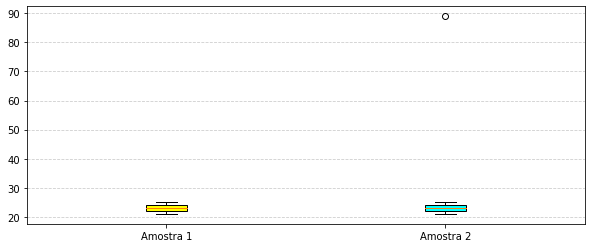

In [31]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
box_amostra1 = ax.boxplot(amostra1,patch_artist=True, positions=[1], labels=['Amostra 1'],
                   boxprops=dict(facecolor='yellow', color='black'))
box_amostra2 = ax.boxplot(amostra2, patch_artist=True, positions=[2], labels=['Amostra 2'], 
                    boxprops=dict(facecolor='cyan', color='black'))
#ax.set_yticks(np.arange(13, 31, 1))
ax.yaxis.grid(color='black', alpha=0.2, linestyle='--')

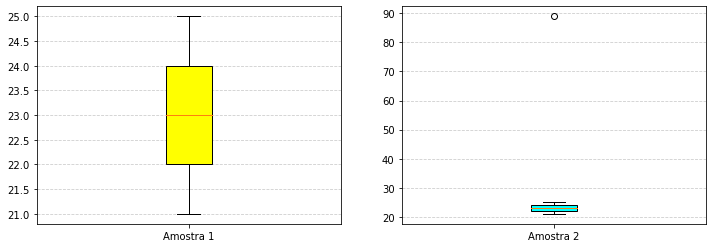

In [32]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
box_amostra1 = ax[0].boxplot(amostra1, patch_artist=True, labels=['Amostra 1'],
                   boxprops=dict(facecolor='yellow', color='black'))
ax[0].yaxis.grid(color='black', alpha=0.2, linestyle='--')

box_amostra2 = ax[1].boxplot(amostra2, patch_artist=True, labels=['Amostra 2'],
                   boxprops=dict(facecolor='cyan', color='black'))
ax[1].yaxis.grid(color='black', alpha=0.2, linestyle='--')

## Correlação de Pearson
- Nos dá o grau de correlação linear entre duas amostras/variáveis e é dada pela fórmula:
<br>
<img src='imagens/pearson.png' width="620" height="300">
<br>
- Seu valor varia de -1 a 1 (correlação negativa ou positiva)
- Quando r = 1, há máxima correlação positiva, ou seja, x e y são perfeita e diretamente correlacionados
- Quando r = -1, há máxima correlação negativa, x e y são perfeita mas inversamente correlacionados
- Quando r = 0, não há nenhuma correlação

<img src='https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img1-2.png'>

In [37]:
r = scipy.stats.pearsonr(amostra1, amostra2)[0]
print('Correlação de Pearson entre a amostra 1 e a amostra 2:')
print('r =',r)

Correlação de Pearson entre a amostra 1 e a amostra 2:
r = 0.528781304072481


- se r >= 0.9, a correlação é muito forte
- se r estiver entre 0.7 e 0.9, a correlação é forte
- se r estiver entre 0.5 e 0.7, a correlação é moderada
- se r estiver entre 0.3 e 0.5, a correlação é fraca
- se r estiver entre 0 e 0.3, a correlação é desprezível